DATA PREPROCESING

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/PA Orbit/train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/PA Orbit/test_data.csv')

In [ ]:
train_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [ ]:
test_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,17-06-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,731.00,6479798.0
1,17-06-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.00,6427532.0
2,17-06-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.00,7231373.0
3,17-06-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,770.75,7840965.0
4,17-06-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.00,7402595.0


In [ ]:
print(train_data['SOURCE_KEY'].unique().size)
print(test_data['SOURCE_KEY'].unique().size)

print(train_data['PLANT_ID'].unique().size)
print(test_data['PLANT_ID'].unique().size)

22
22
1
1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66710 entries, 0 to 66709
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    66710 non-null  object 
 1   PLANT_ID     66710 non-null  int64  
 2   SOURCE_KEY   66710 non-null  object 
 3   DC_POWER     66710 non-null  float64
 4   AC_POWER     66710 non-null  float64
 5   DAILY_YIELD  66710 non-null  float64
 6   TOTAL_YIELD  66710 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    2068 non-null   object 
 1   PLANT_ID     2068 non-null   int64  
 2   SOURCE_KEY   2068 non-null   object 
 3   DC_POWER     2068 non-null   float64
 4   AC_POWER     2068 non-null   float64
 5   DAILY_YIELD  2068 non-null   float64
 6   TOTAL_YIELD  2068 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 113.2+ KB


In [ ]:
train_data['DATE_TIME'] = pd.to_datetime(train_data['DATE_TIME'])
test_data['DATE_TIME'] = pd.to_datetime(test_data['DATE_TIME'])

In [ ]:
train_data.set_index('DATE_TIME', inplace=True)

In [ ]:
test_data.set_index('DATE_TIME', inplace=True)

In [ ]:
train_data_resampled = train_data.resample('15T').first()

In [ ]:
test_data_resampled = test_data.resample('15T').first()

In [ ]:
train_data_resampled.reset_index(inplace=True)
test_data_resampled.reset_index(inplace=True)

In [ ]:
train_data = train_data_resampled.copy()
train_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-01-06 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,829.0,6377931.0
1,2020-01-06 00:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6377931.0
2,2020-01-06 00:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6377931.0
3,2020-01-06 00:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6377931.0
4,2020-01-06 01:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6377931.0
...,...,...,...,...,...,...,...
32251,2020-12-06 22:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5441.0,6455679.0
32252,2020-12-06 23:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5441.0,6455679.0
32253,2020-12-06 23:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5441.0,6455679.0
32254,2020-12-06 23:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5441.0,6455679.0


In [ ]:
test_data = test_data_resampled.copy()
test_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-06-17 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,731.0,6479798.0
1,2020-06-17 00:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0
2,2020-06-17 00:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0
3,2020-06-17 00:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0
4,2020-06-17 01:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0
...,...,...,...,...,...,...,...
91,2020-06-17 22:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
92,2020-06-17 23:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
93,2020-06-17 23:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
94,2020-06-17 23:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0


In [ ]:
train_data.to_csv('train_data_preprocessed.csv', index=False)
test_data.to_csv('test_data_preprocessed.csv', index=False)

In [ ]:
from google.colab import files
files.download('train_data_preprocessed.csv')
files.download('test_data_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CEK MISSING AND NULL VALUES

In [ ]:
train_data.isnull().sum()

DATE_TIME          0
PLANT_ID       29192
SOURCE_KEY     29192
DC_POWER       29192
AC_POWER       29192
DAILY_YIELD    29192
TOTAL_YIELD    29192
dtype: int64

In [ ]:
PLANT_ID_mode = train_data['PLANT_ID'].mode()
SOURCE_KEY_mode = train_data['SOURCE_KEY'].mode()
DC_POWER_median = train_data['DC_POWER'].median()
AC_POWER_median = train_data['AC_POWER'].median()
DAILY_YIELD_median = train_data['DAILY_YIELD'].median()
TOTAL_YIELD_median = train_data['TOTAL_YIELD'].median()

In [ ]:
train_data['PLANT_ID'].fillna(PLANT_ID_mode[0], inplace=True)
train_data['SOURCE_KEY'].fillna(SOURCE_KEY_mode[0], inplace=True)
train_data['DC_POWER'].fillna(DC_POWER_median, inplace=True)
train_data['AC_POWER'].fillna(AC_POWER_median, inplace=True)
train_data['DAILY_YIELD'].fillna(DAILY_YIELD_median, inplace=True)
train_data['TOTAL_YIELD'].fillna(TOTAL_YIELD_median, inplace=True)

train_data.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [ ]:
test_data.isnull().sum()

DATE_TIME      0
PLANT_ID       2
SOURCE_KEY     2
DC_POWER       2
AC_POWER       2
DAILY_YIELD    2
TOTAL_YIELD    2
dtype: int64

In [ ]:
PLANT_ID_mode = test_data['PLANT_ID'].mode()
SOURCE_KEY_mode = test_data['SOURCE_KEY'].mode()
DC_POWER_median = test_data['DC_POWER'].median()
AC_POWER_median = test_data['AC_POWER'].median()
DAILY_YIELD_median = test_data['DAILY_YIELD'].median()
TOTAL_YIELD_median = test_data['TOTAL_YIELD'].median()

In [ ]:
test_data['PLANT_ID'].fillna(PLANT_ID_mode[0], inplace=True)
test_data['SOURCE_KEY'].fillna(SOURCE_KEY_mode[0], inplace=True)
test_data['DC_POWER'].fillna(DC_POWER_median, inplace=True)
test_data['AC_POWER'].fillna(AC_POWER_median, inplace=True)
test_data['DAILY_YIELD'].fillna(DAILY_YIELD_median, inplace=True)
test_data['TOTAL_YIELD'].fillna(TOTAL_YIELD_median, inplace=True)

test_data.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [ ]:
train_data.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,32256.0,32256.000000,32256.000000,32256.000000,3.225600e+04
mean,4135001.0,542.620680,52.749053,3058.180046,6.377568e+06
std,0.0,1389.090960,135.870571,910.786546,2.016817e+04
min,4135001.0,0.000000,0.000000,0.000000,6.257480e+06
25%,4135001.0,296.526786,28.640179,3038.625000,6.377931e+06
50%,4135001.0,296.526786,28.640179,3038.625000,6.377931e+06
75%,4135001.0,296.526786,28.640179,3038.625000,6.377931e+06
max,4135001.0,13335.142860,1300.171429,8268.000000,6.479798e+06


In [ ]:
test_data.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,96.0,96.000000,96.000000,96.000000,9.600000e+01
mean,4135001.0,2340.655432,229.110048,2787.928385,6.482578e+06
std,0.0,3250.647065,318.024418,2402.268862,2.410004e+03
min,4135001.0,0.000000,0.000000,0.000000,6.479798e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.479798e+06
50%,4135001.0,193.589286,18.699107,2774.687500,6.482573e+06
75%,4135001.0,4654.062500,456.550446,5492.750000,6.485291e+06
max,4135001.0,12764.125000,1244.787500,5521.000000,6.485319e+06


In [ ]:
len(train_data)

32256

In [ ]:
len(test_data)

96

Exploratory Data Analysis (EDA)

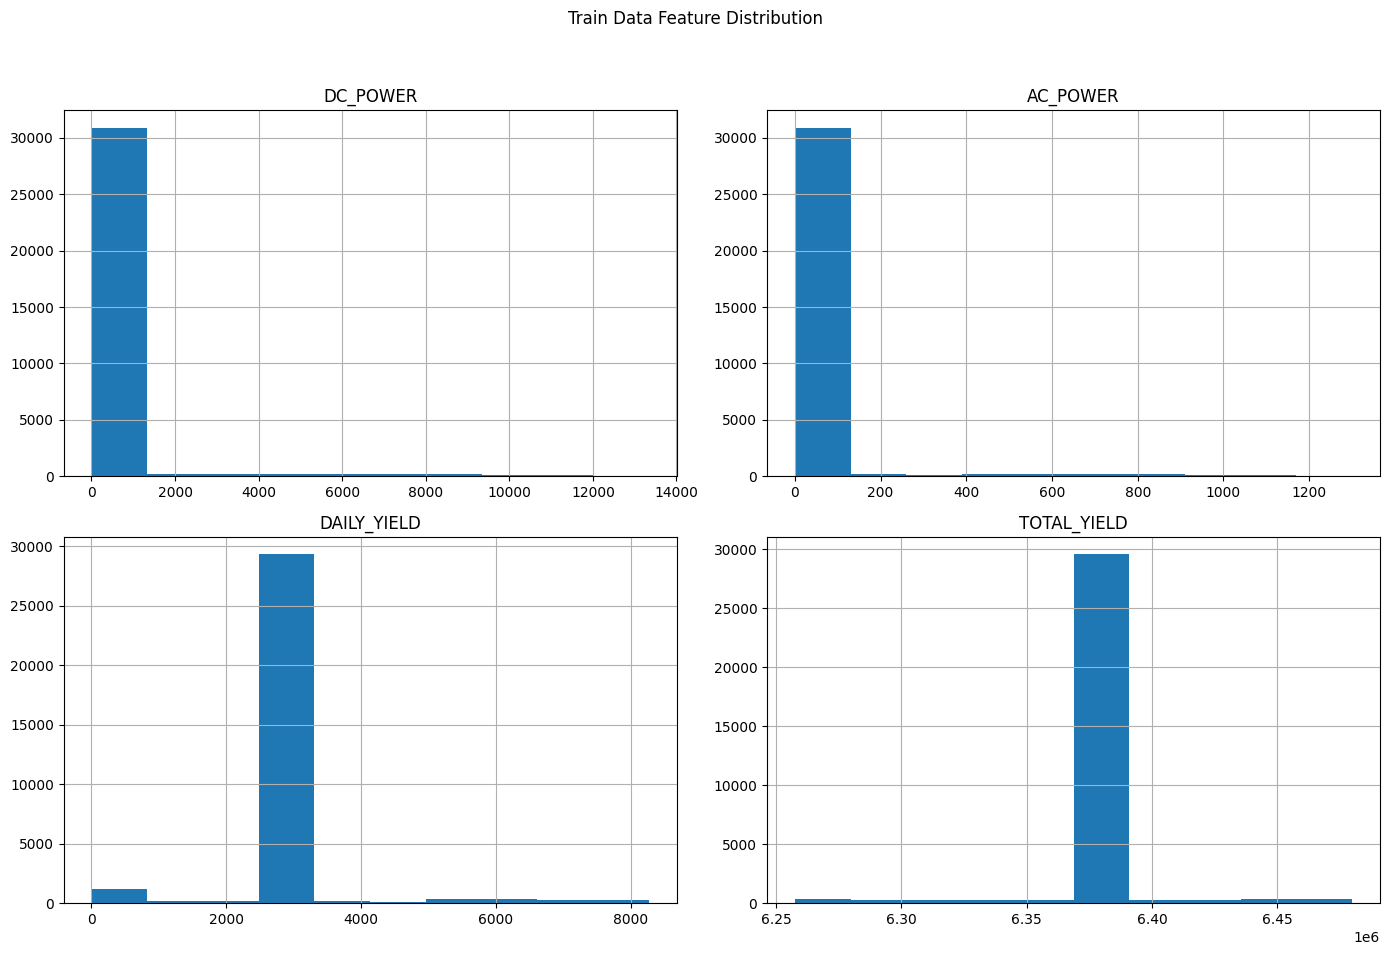

In [ ]:
#Visualisasi Distribusi Fitur Data Latih
train_data[['DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD']].hist(figsize=(14,10))
plt.suptitle("Train Data Feature Distribution")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

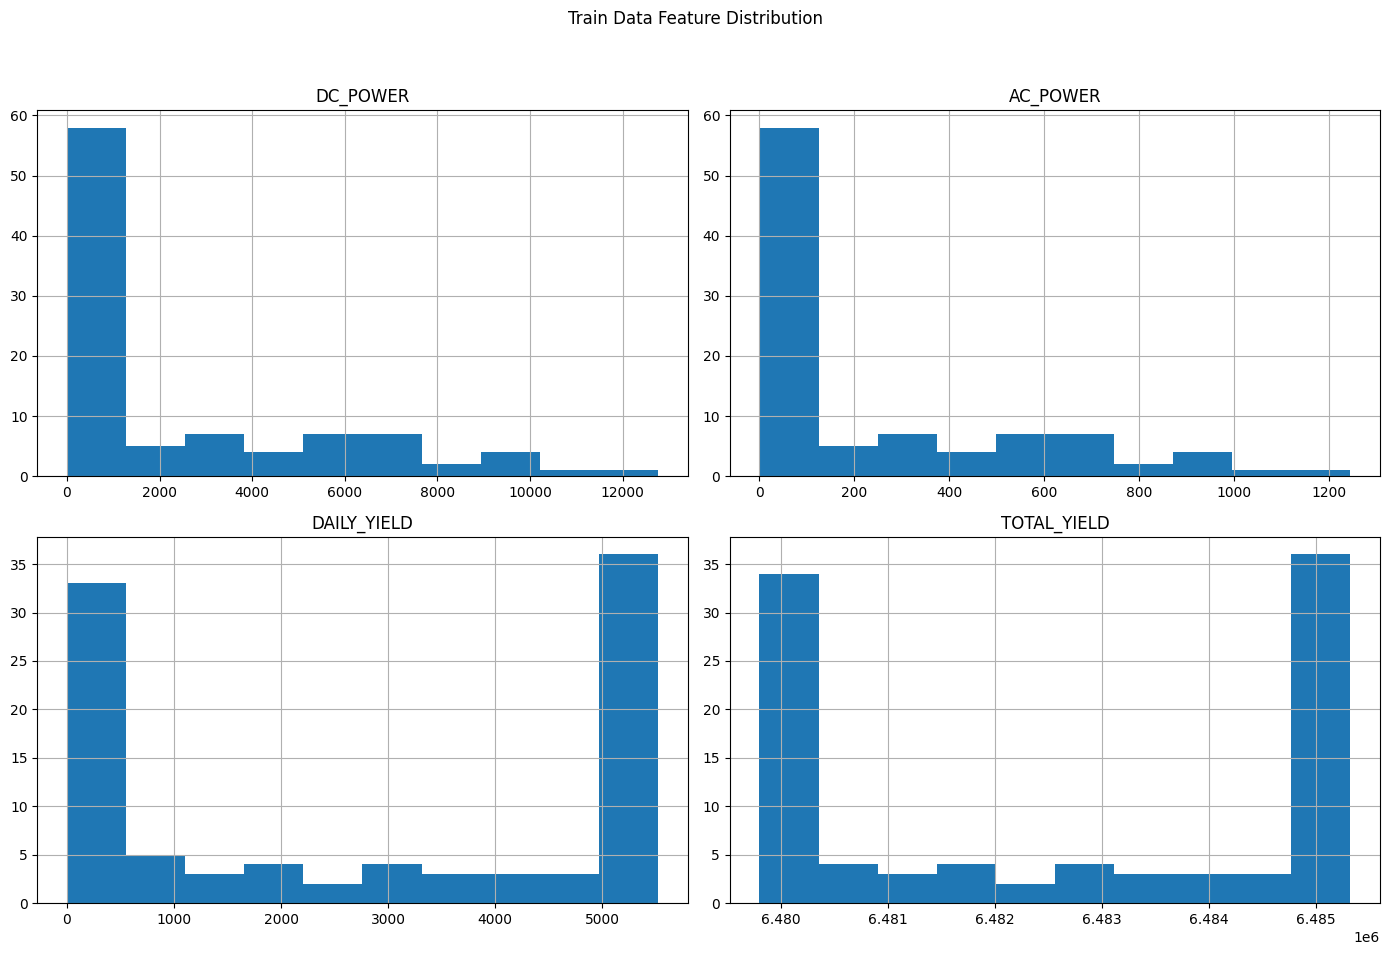

In [ ]:
#Visualisasi Distribusi Fitur Data Uji
test_data[['DC_POWER', 'AC_POWER','DAILY_YIELD','TOTAL_YIELD']].hist(figsize=(14,10))
plt.suptitle("Train Data Feature Distribution")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

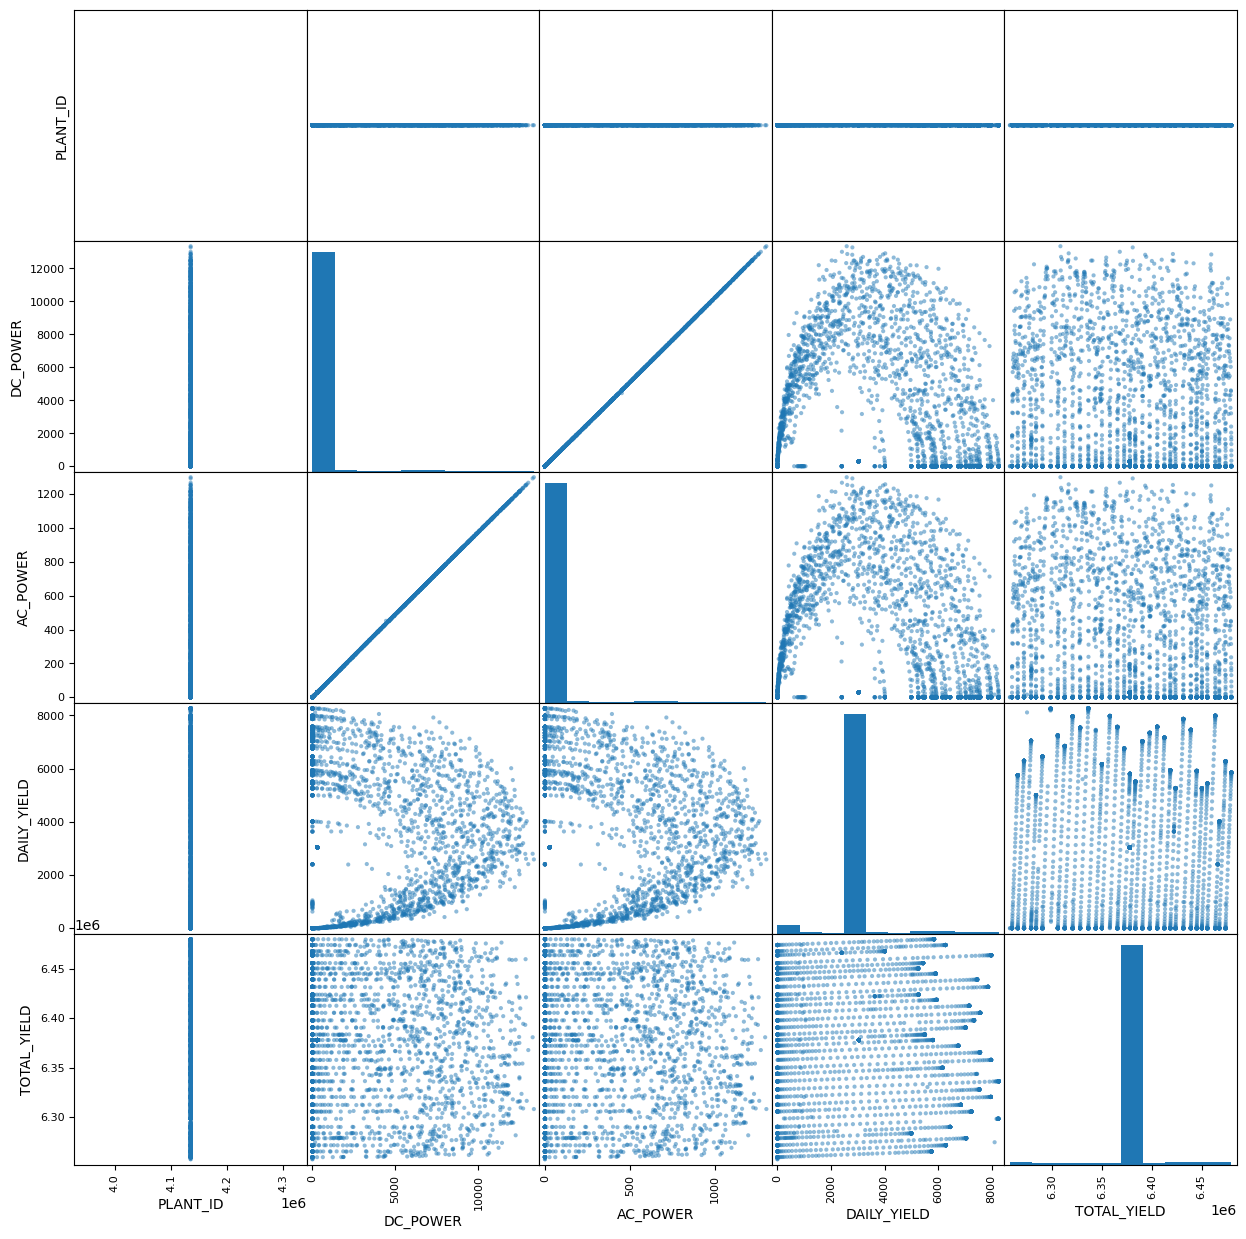

In [ ]:
#Visualisasi Scatter Matrix Data Latih
pd.plotting.scatter_matrix(train_data, figsize=(15,15))

plt.show()

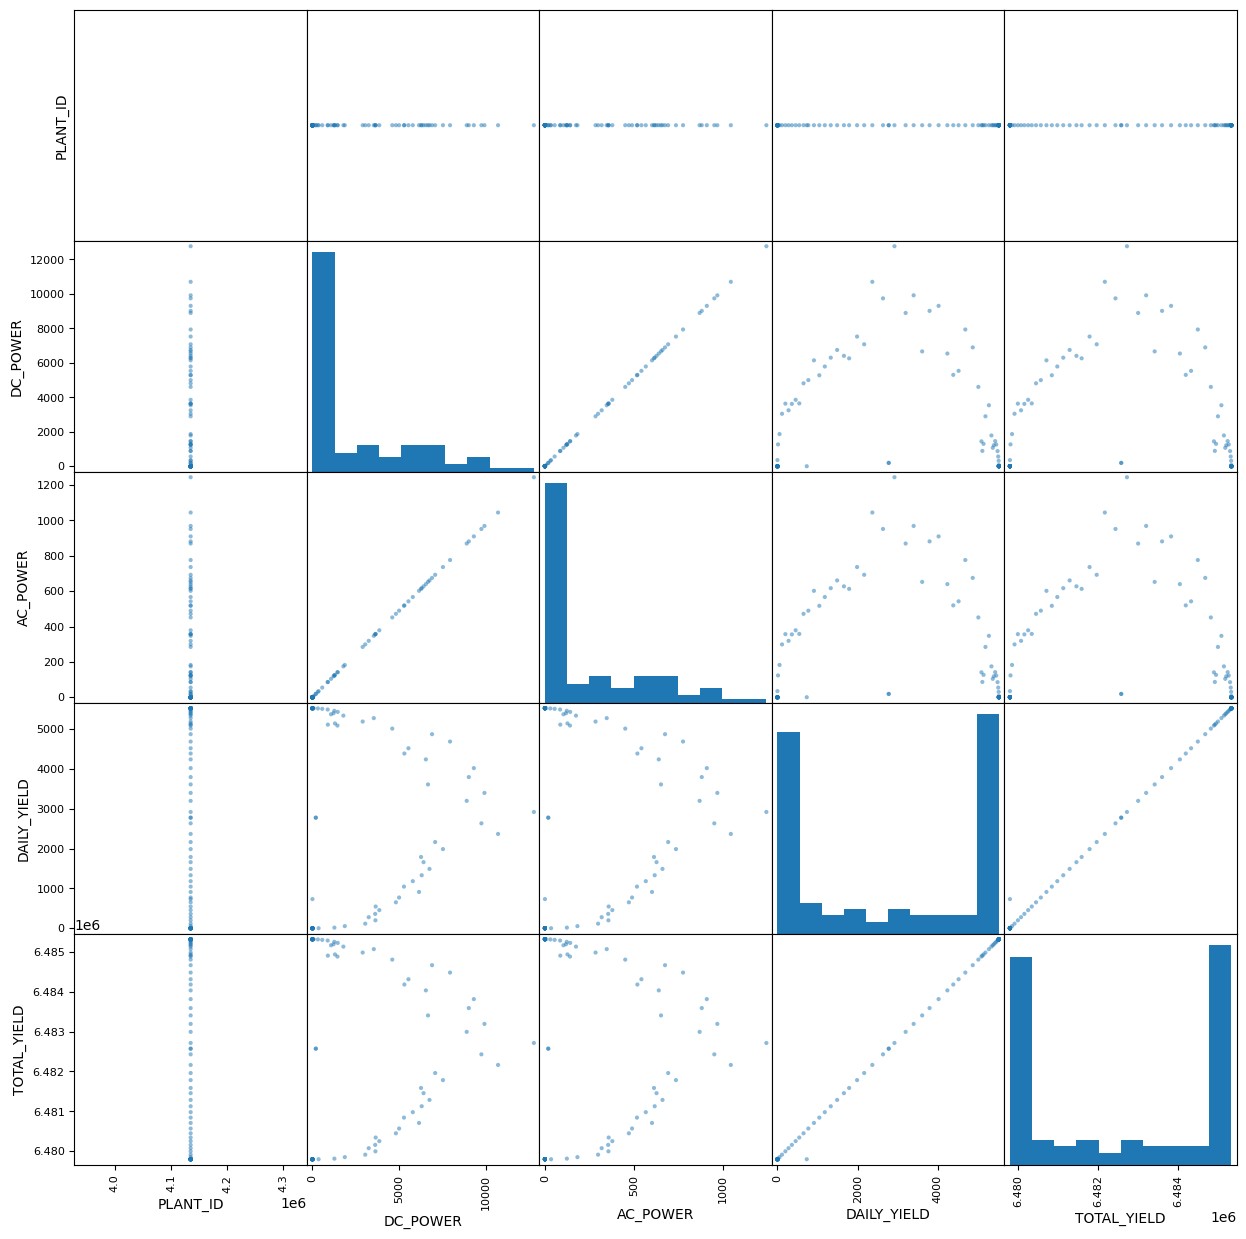

In [ ]:
#Visualisasi Scatter Matrix Data Uji
pd.plotting.scatter_matrix(test_data, figsize=(15,15))

plt.show()

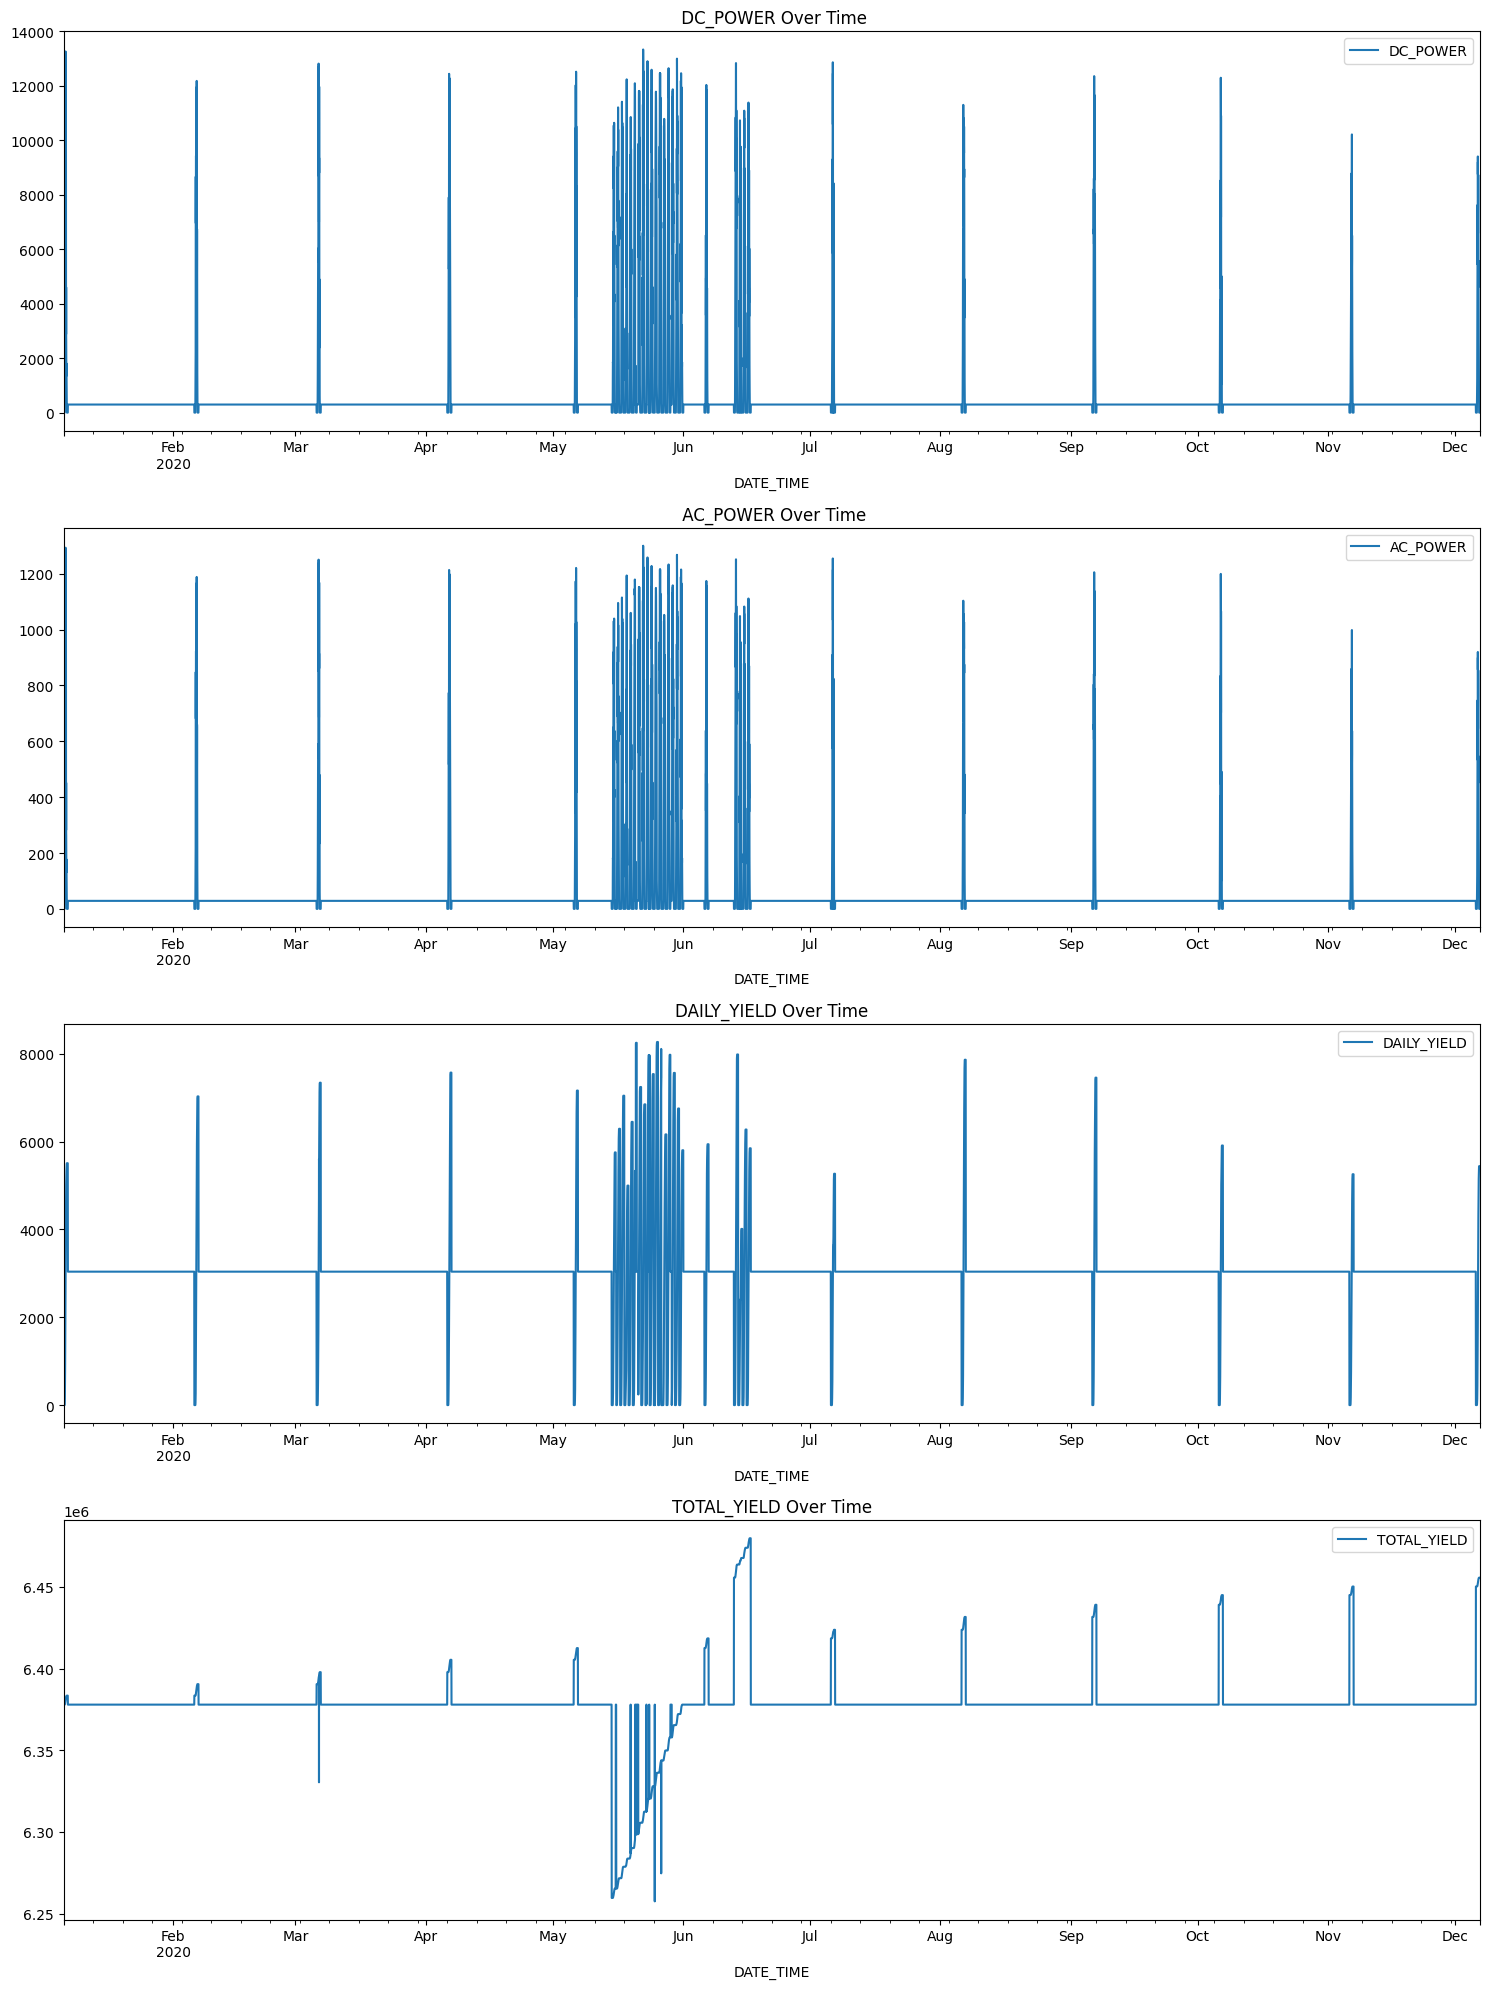

In [ ]:
#Memvisualisasikan tren deret waktu untuk fitur-fitur utama train data (data latih)
fig, axes = plt.subplots (nrows=4, ncols=1, figsize=(15, 20))
train_data.plot(x='DATE_TIME', y='DC_POWER', ax=axes[0], title=" DC_POWER Over Time")
train_data.plot(x='DATE_TIME', y='AC_POWER', ax=axes[1], title=" AC_POWER Over Time")
train_data.plot(x='DATE_TIME', y='DAILY_YIELD', ax=axes[2], title="DAILY_YIELD Over Time")
train_data.plot(x='DATE_TIME', y='TOTAL_YIELD', ax=axes[3], title="TOTAL_YIELD Over Time")
plt.tight_layout()
plt.show()

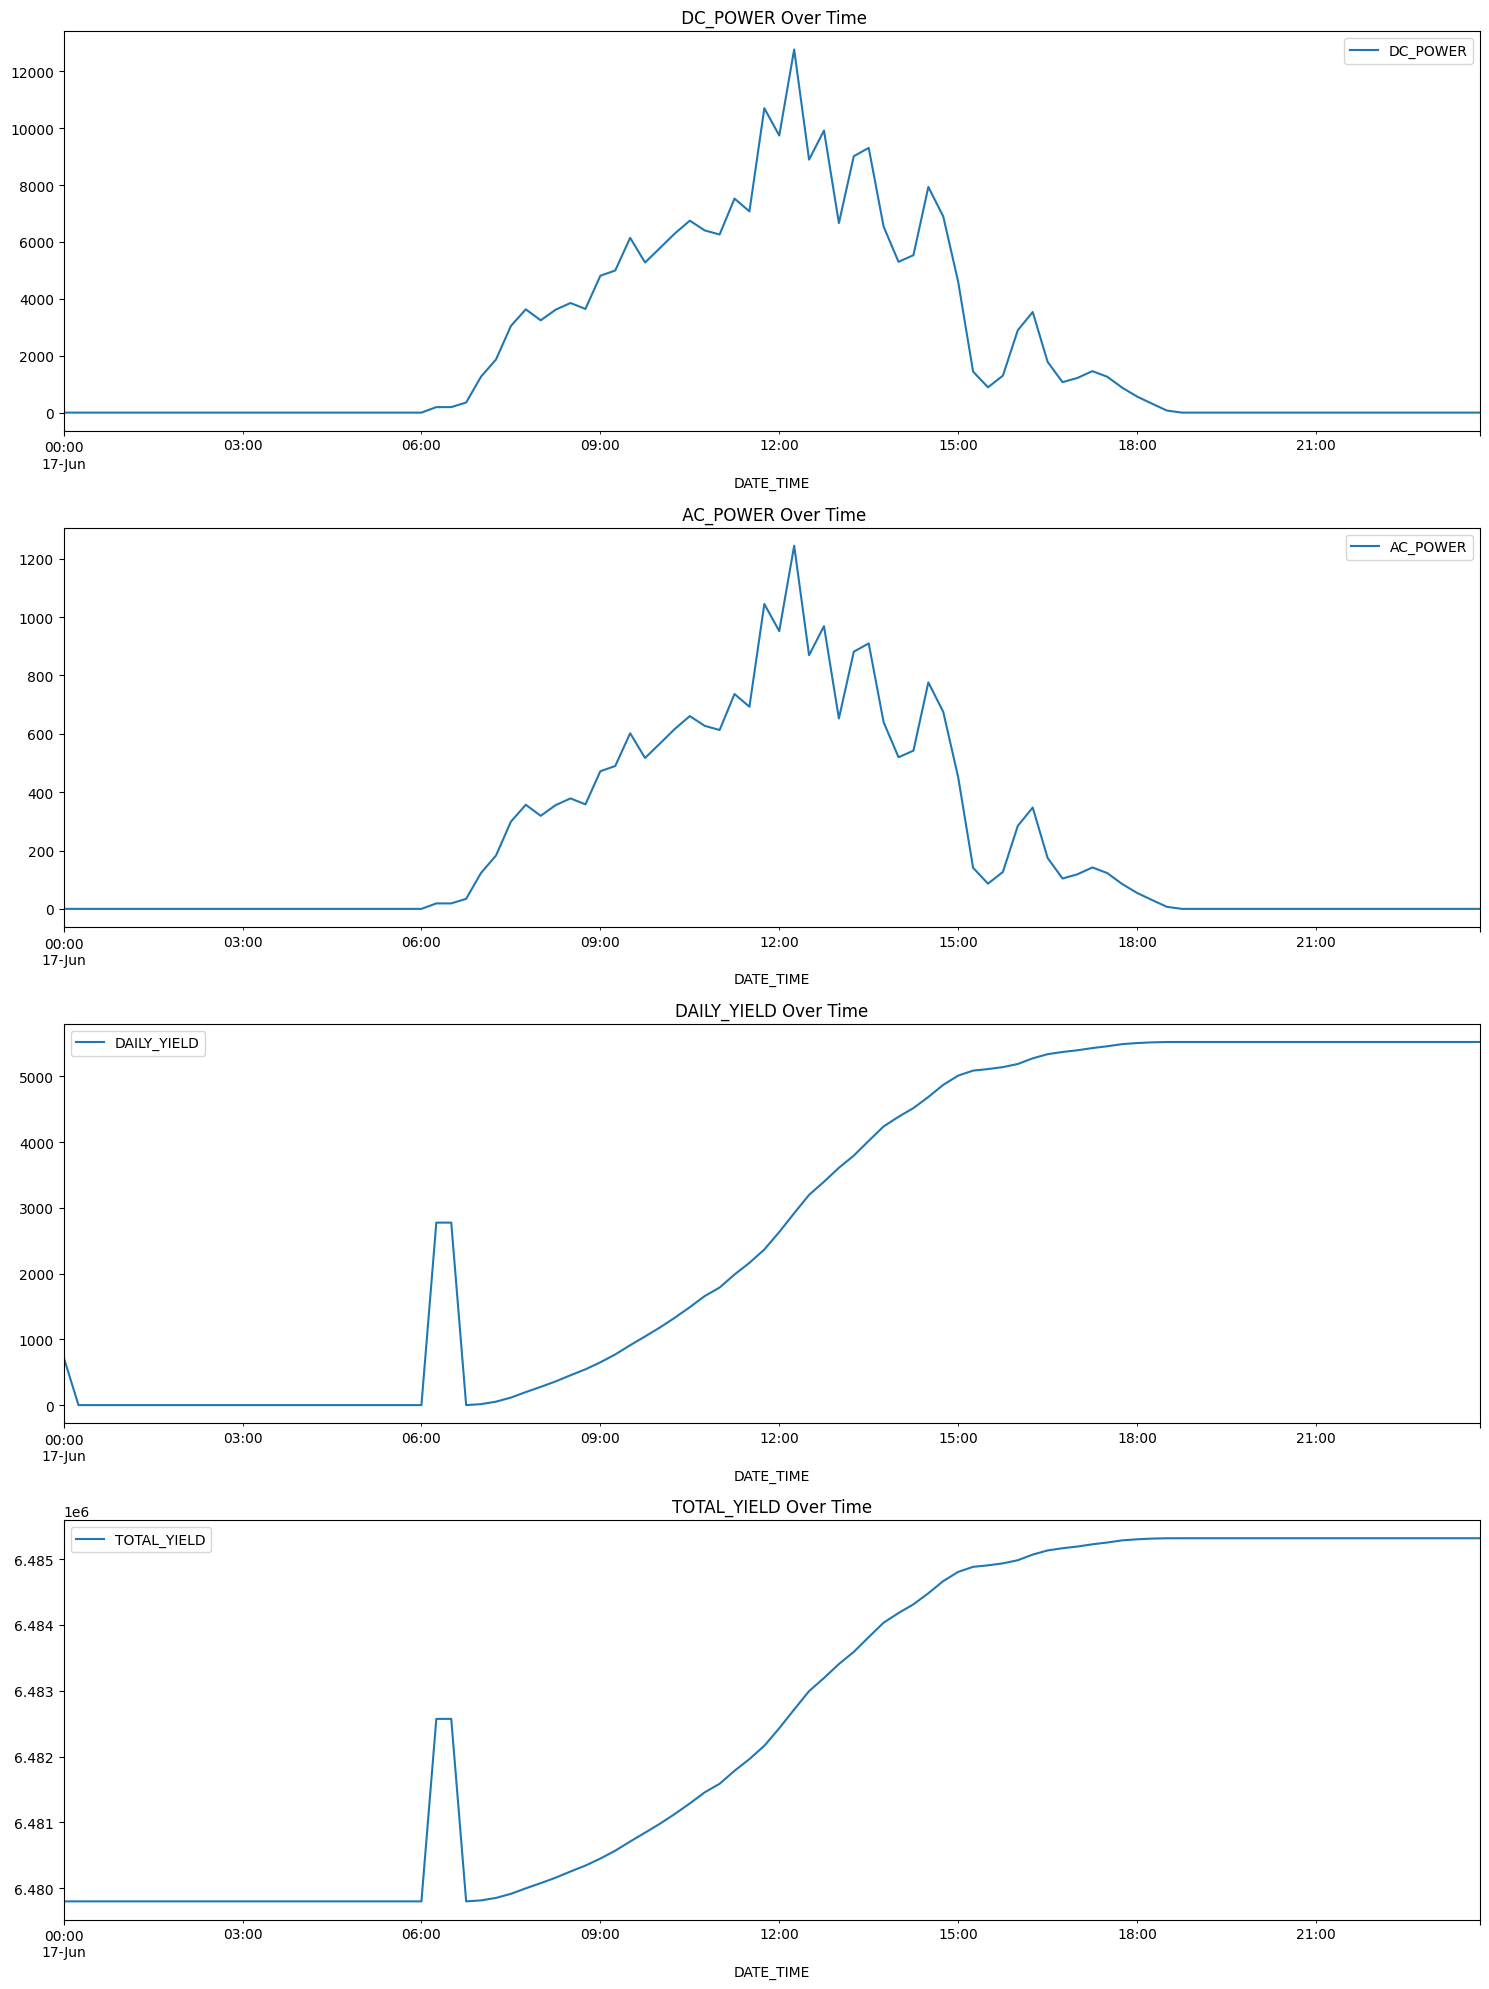

In [ ]:
#Memvisualisasikan tren deret waktu untuk fitur-fitur utama test data (data uji)
fig, axes = plt.subplots (nrows=4, ncols=1, figsize=(15, 20))
test_data.plot(x='DATE_TIME', y='DC_POWER', ax=axes[0], title=" DC_POWER Over Time")
test_data.plot(x='DATE_TIME', y='AC_POWER', ax=axes[1], title=" AC_POWER Over Time")
test_data.plot(x='DATE_TIME', y='DAILY_YIELD', ax=axes[2], title="DAILY_YIELD Over Time")
test_data.plot(x='DATE_TIME', y='TOTAL_YIELD', ax=axes[3], title="TOTAL_YIELD Over Time")
plt.tight_layout()
plt.show()

UBAH 'SOURCE_KEY' MENJADI NUMERIK

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

train_data['SOURCE_KEY_NUMBER'] = encoder.fit_transform(train_data['SOURCE_KEY'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE_TIME          32256 non-null  datetime64[ns]
 1   PLANT_ID           32256 non-null  float64       
 2   SOURCE_KEY         32256 non-null  object        
 3   DC_POWER           32256 non-null  float64       
 4   AC_POWER           32256 non-null  float64       
 5   DAILY_YIELD        32256 non-null  float64       
 6   TOTAL_YIELD        32256 non-null  float64       
 7   SOURCE_KEY_NUMBER  32256 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
test_data['SOURCE_KEY_NUMBER'] = encoder.fit_transform(test_data['SOURCE_KEY'])

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE_TIME          96 non-null     datetime64[ns]
 1   PLANT_ID           96 non-null     float64       
 2   SOURCE_KEY         96 non-null     object        
 3   DC_POWER           96 non-null     float64       
 4   AC_POWER           96 non-null     float64       
 5   DAILY_YIELD        96 non-null     float64       
 6   TOTAL_YIELD        96 non-null     float64       
 7   SOURCE_KEY_NUMBER  96 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 6.1+ KB


In [ ]:
train_data.corr()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_NUMBER
PLANT_ID,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999997,0.066297,-0.063216,0.010006
AC_POWER,NaN,0.999997,1.000000,0.066264,-0.063181,0.010045
DAILY_YIELD,NaN,0.066297,0.066264,1.000000,0.001302,0.004517
TOTAL_YIELD,NaN,-0.063216,-0.063181,0.001302,1.000000,-0.053879
SOURCE_KEY_NUMBER,NaN,0.010006,0.010045,0.004517,-0.053879,1.000000


In [ ]:
test_data.corr()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_NUMBER
PLANT_ID,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999997,-0.011258,-0.008923,NaN
AC_POWER,NaN,0.999997,1.000000,-0.011750,-0.009412,NaN
DAILY_YIELD,NaN,-0.011258,-0.011750,1.000000,0.999524,NaN
TOTAL_YIELD,NaN,-0.008923,-0.009412,0.999524,1.000000,NaN
SOURCE_KEY_NUMBER,NaN,NaN,NaN,NaN,NaN,NaN


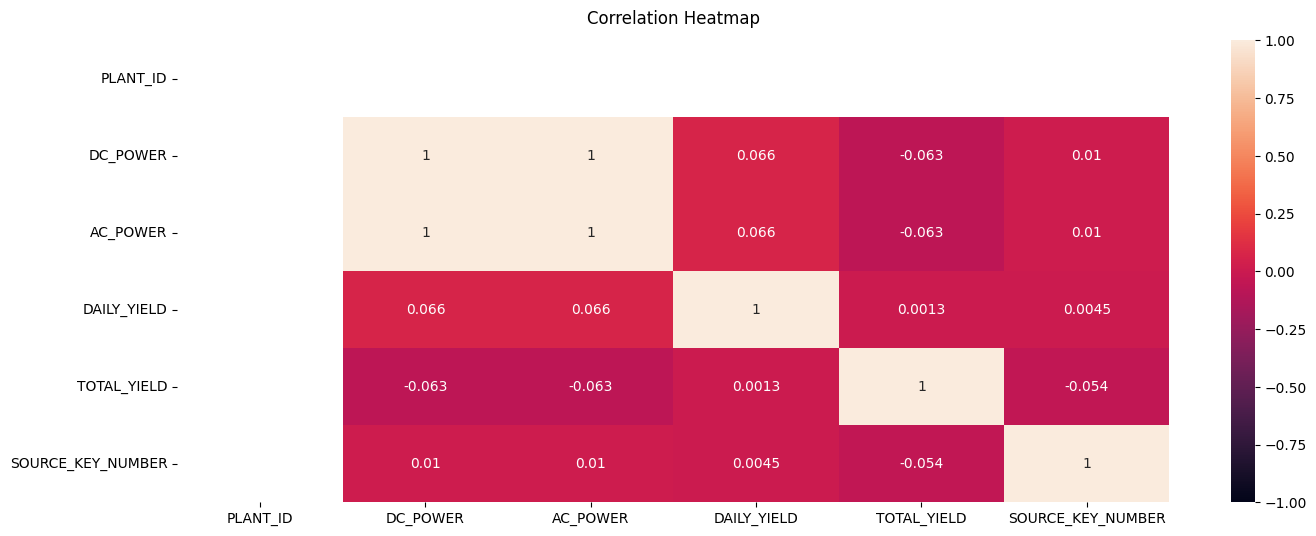

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

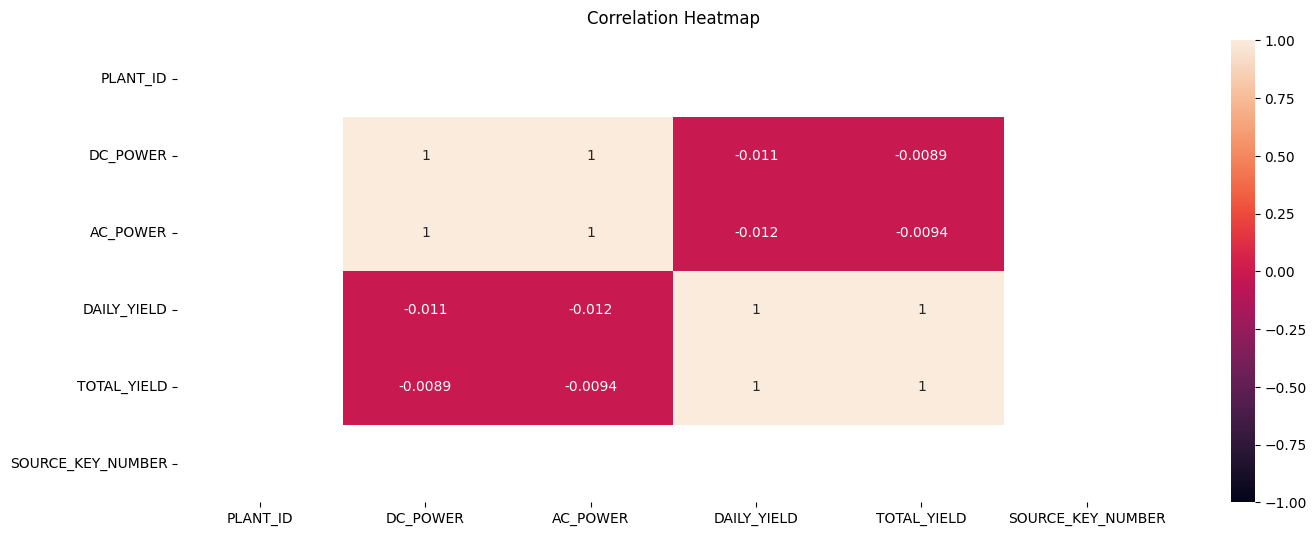

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(test_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
corr_train = train_data.corr()
corr_train.style.background_gradient(cmap='coolwarm')

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_NUMBER
PLANT_ID,nan,nan,nan,nan,nan,nan
DC_POWER,nan,1.000000,0.999997,0.066297,-0.063216,0.010006
AC_POWER,nan,0.999997,1.000000,0.066264,-0.063181,0.010045
DAILY_YIELD,nan,0.066297,0.066264,1.000000,0.001302,0.004517
TOTAL_YIELD,nan,-0.063216,-0.063181,0.001302,1.000000,-0.053879
SOURCE_KEY_NUMBER,nan,0.010006,0.010045,0.004517,-0.053879,1.000000


In [ ]:
corr_test = test_data.corr()
corr_test.style.background_gradient(cmap='coolwarm')

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_NUMBER
PLANT_ID,nan,nan,nan,nan,nan,nan
DC_POWER,nan,1.000000,0.999997,-0.011258,-0.008923,nan
AC_POWER,nan,0.999997,1.000000,-0.011750,-0.009412,nan
DAILY_YIELD,nan,-0.011258,-0.011750,1.000000,0.999524,nan
TOTAL_YIELD,nan,-0.008923,-0.009412,0.999524,1.000000,nan
SOURCE_KEY_NUMBER,nan,nan,nan,nan,nan,nan


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE_TIME          32256 non-null  datetime64[ns]
 1   PLANT_ID           32256 non-null  float64       
 2   SOURCE_KEY         32256 non-null  object        
 3   DC_POWER           32256 non-null  float64       
 4   AC_POWER           32256 non-null  float64       
 5   DAILY_YIELD        32256 non-null  float64       
 6   TOTAL_YIELD        32256 non-null  float64       
 7   SOURCE_KEY_NUMBER  32256 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE_TIME          96 non-null     datetime64[ns]
 1   PLANT_ID           96 non-null     float64       
 2   SOURCE_KEY         96 non-null     object        
 3   DC_POWER           96 non-null     float64       
 4   AC_POWER           96 non-null     float64       
 5   DAILY_YIELD        96 non-null     float64       
 6   TOTAL_YIELD        96 non-null     float64       
 7   SOURCE_KEY_NUMBER  96 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 6.1+ KB


Persiapan Pengujian Model

Pembagian Dataset

In [ ]:
train_data_ml = train_data.copy()
x_train = train_data[['AC_POWER','DAILY_YIELD','TOTAL_YIELD']].values
y_train = train_data['DC_POWER'].values

In [ ]:
test_data_ml = train_data.copy()
x_test = test_data[['AC_POWER','DAILY_YIELD','TOTAL_YIELD']].values
y_test = test_data['DC_POWER'].values

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
# Training model Regresi Linier
LinearReg = LinearRegression().fit(x_train, y_train)

# Training model Lasso
LassoReg = Lasso(alpha=0.1).fit(x_train, y_train) # alpha ini berhubungan dengan namanya regulasi

# Training model Ridge
RidgeReg = Ridge(alpha=0.1).fit(x_train, y_train) # alpha ini berhubungan dengan namanya regulasi

# # Training model Support Vectore Regression (SVR)
# SVReg = SVR().fit(X_train_scaled, y_train)

# Training model Decision Tree Regression (DTR)
DTReg = DecisionTreeRegressor(random_state=47).fit(x_train, y_train)

In [ ]:
# Hasil prediksi model Regresi Linier
ypredtrain_reglin = LinearReg.predict(x_train)
ypredtest_reglin = LinearReg.predict(x_test)

# Hasil prediksi model Lasso
ypredtrain_lasso = LassoReg.predict(x_train)
ypredtest_lasso = LassoReg.predict(x_test)

# Hasil prediksi model Ridge
ypredtrain_ridge = RidgeReg.predict(x_train)
ypredtest_ridge = RidgeReg.predict(x_test)

# # Hasil prediksi model SVR
# ypredtrain_svr = SVReg.predict(X_train)
# ypredtest_svr = SVReg.predict(X_test)

# Hasil prediksi model DTR
ypredtrain_dtr = DTReg.predict(x_train)
ypredtest_dtr = DTReg.predict(x_test)

In [ ]:
# MSE model Regresi Linier
print('Nilai RMSE data training Regresi Linier = ', sqrt(mean_squared_error(y_train, ypredtrain_reglin)))
print('Nilai RMSE data testing Regresi Linier = ', sqrt(mean_squared_error(y_test, ypredtest_reglin)), '\n')

# MSE model Lasso
print('Nilai RMSE data training Regresi Lasso = ', sqrt(mean_squared_error(y_train, ypredtrain_lasso)))
print('Nilai RMSE data testing Regresi Lasso = ', sqrt(mean_squared_error(y_test, ypredtest_lasso)), '\n')

# MSE model Ridge
print('Nilai RMSE data training Regresi Ridge = ', sqrt(mean_squared_error(y_train, ypredtrain_ridge)))
print('Nilai RMSE data testing Regresi Ridge = ', sqrt(mean_squared_error(y_test, ypredtest_ridge)), '\n')

# # MSE model SVR
# print('Nilai RMSE data training Regresi SVR = ', sqrt(mean_squared_error(y_train, ypredtrain_svr)))
# print('Nilai RMSE data testing Regresi SVR = ', sqrt(mean_squared_error(y_test, ypredtest_svr)), '\n')

# MSE model DTR
print('Nilai RMSE data training Regresi DTR = ', sqrt(mean_squared_error(y_train, ypredtrain_dtr)))
print('Nilai RMSE data testing Regresi DTR = ', sqrt(mean_squared_error(y_test, ypredtest_dtr)))

Nilai RMSE data training Regresi Linier =  3.2005994878997193
Nilai RMSE data testing Regresi Linier =  9.045484265920145 

Nilai RMSE data training Regresi Lasso =  3.200599561006051
Nilai RMSE data testing Regresi Lasso =  9.044838839792291 

Nilai RMSE data training Regresi Ridge =  3.2005994878997277
Nilai RMSE data testing Regresi Ridge =  9.045484014714422 

Nilai RMSE data training Regresi DTR =  1.3113499489738774e-10
Nilai RMSE data testing Regresi DTR =  8.884054365199802


In [ ]:
# R^2 Score
print(f'R^2 score Regresi Linier: {LinearReg.score(x_train, y_train)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(x_train, y_train)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(x_train, y_train)}')
# print(f'R^2 score SVR: {SVReg.score(X, y)}')
print(f'R^2 score DT: {DTReg.score(x_train, y_train)}')

R^2 score Regresi Linier: 0.9999946909751617
R^2 score Regresi Lasso: 0.9999946909749191
R^2 score Regresi Ridge: 0.9999946909751617
R^2 score DT: 1.0


In [ ]:
# R^2 Score
print(f'R^2 score Regresi Linier: {LinearReg.score(x_test, y_test)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(x_test, y_test)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(x_test, y_test)}')
# print(f'R^2 score SVR: {SVReg.score(X, y)}')
print(f'R^2 score DT: {DTReg.score(x_test, y_test)}')

R^2 score Regresi Linier: 0.9999921752290285
R^2 score Regresi Lasso: 0.9999921763456369
R^2 score Regresi Ridge: 0.9999921752294632
R^2 score DT: 0.9999924520258404


In [ ]:
len(ypredtest_ridge)

96

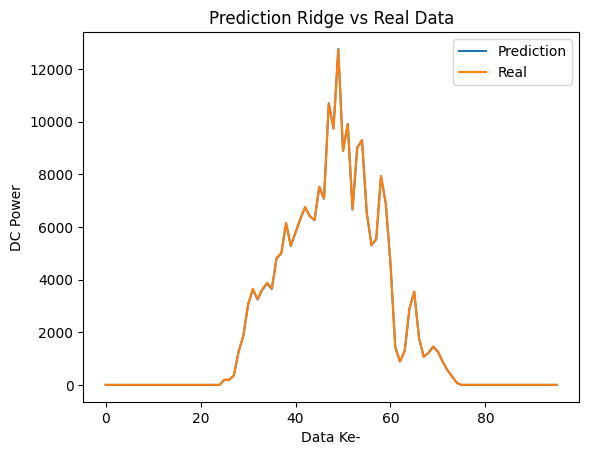

In [ ]:
plt.plot(y_test)      #Line chart data sebenarnya
plt.plot(ypredtest_ridge)                            # Line chart hasil prediksi model
plt.title('Prediction Ridge vs Real Data')         # Judul plot
plt.xlabel("Data Ke-")                                      # Nama sumbu X
plt.ylabel("DC Power")                                 # Nama sumbu Y
plt.legend(labels=['Prediction','Real'])                    # Menambahkan legenda pada plot
plt.show()

In [ ]:
best_model = Ridge(alpha=0.1)
best_model.fit(x_train_scaled, y_train)

Ridge(alpha=0.1)

# Save Model

In [ ]:
import pickle

In [ ]:
# menyimpan model terbaik
pickle.dump(RidgeReg, open('model3.pkl', 'wb'))

Data Testing Prediksi

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/PA Orbit/test_data.csv')
data = df1.copy()
data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,17-06-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,731.00,6479798.0
1,17-06-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.00,6427532.0
2,17-06-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.00,7231373.0
3,17-06-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,770.75,7840965.0
4,17-06-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.00,7402595.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    2068 non-null   object 
 1   PLANT_ID     2068 non-null   int64  
 2   SOURCE_KEY   2068 non-null   object 
 3   DC_POWER     2068 non-null   float64
 4   AC_POWER     2068 non-null   float64
 5   DAILY_YIELD  2068 non-null   float64
 6   TOTAL_YIELD  2068 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 113.2+ KB


In [ ]:
data['DATE_TIME'] = pd.to_datetime(data["DATE_TIME"])

In [ ]:
data['SOURCE_KEY_NUMBER'] = encoder.fit_transform(data['SOURCE_KEY'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE_TIME          2068 non-null   datetime64[ns]
 1   PLANT_ID           2068 non-null   int64         
 2   SOURCE_KEY         2068 non-null   object        
 3   DC_POWER           2068 non-null   float64       
 4   AC_POWER           2068 non-null   float64       
 5   DAILY_YIELD        2068 non-null   float64       
 6   TOTAL_YIELD        2068 non-null   float64       
 7   SOURCE_KEY_NUMBER  2068 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 129.4+ KB


In [ ]:
data.set_index('DATE_TIME', inplace=True)

In [ ]:
data_resampled = data.resample('15T').first()

In [ ]:
data_resampled.reset_index(inplace=True)

In [ ]:
data = data_resampled.copy()
data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_NUMBER
0,2020-06-17 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,731.0,6479798.0,0.0
1,2020-06-17 00:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,0.0
2,2020-06-17 00:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,0.0
3,2020-06-17 00:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,0.0
4,2020-06-17 01:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,0.0
...,...,...,...,...,...,...,...,...
91,2020-06-17 22:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,0.0
92,2020-06-17 23:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,0.0
93,2020-06-17 23:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,0.0
94,2020-06-17 23:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,0.0


In [ ]:
data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_NUMBER
0,2020-06-17 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,731.0,6479798.0,0.0
1,2020-06-17 00:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,0.0
2,2020-06-17 00:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,0.0
3,2020-06-17 00:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,0.0
4,2020-06-17 01:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,0.0


In [ ]:
data.isnull().sum()

DATE_TIME            0
PLANT_ID             0
SOURCE_KEY           0
DC_POWER             0
AC_POWER             0
DAILY_YIELD          0
TOTAL_YIELD          0
SOURCE_KEY_NUMBER    2
dtype: int64

In [ ]:
PLANT_ID_mode = data['PLANT_ID'].mode()
SOURCE_KEY_mode = data['SOURCE_KEY'].mode()
DC_POWER_median = data['DC_POWER'].median()
AC_POWER_median = data['AC_POWER'].median()
DAILY_YIELD_median = data['DAILY_YIELD'].median()
TOTAL_YIELD_median = data['TOTAL_YIELD'].median()

data['PLANT_ID'].fillna(PLANT_ID_mode[0], inplace=True)
data['SOURCE_KEY'].fillna(SOURCE_KEY_mode[0], inplace=True)
data['DC_POWER'].fillna(DC_POWER_median, inplace=True)
data['AC_POWER'].fillna(AC_POWER_median, inplace=True)
data['DAILY_YIELD'].fillna(DAILY_YIELD_median, inplace=True)
data['TOTAL_YIELD'].fillna(TOTAL_YIELD_median, inplace=True)

data.isnull().sum()

DATE_TIME            0
PLANT_ID             0
SOURCE_KEY           0
DC_POWER             0
AC_POWER             0
DAILY_YIELD          0
TOTAL_YIELD          0
SOURCE_KEY_NUMBER    2
dtype: int64

In [ ]:
data.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_NUMBER
count,96.0,96.000000,96.000000,96.000000,9.600000e+01,94.0
mean,4135001.0,2340.655432,229.110048,2787.928385,6.482578e+06,0.0
std,0.0,3250.647065,318.024418,2402.268862,2.410004e+03,0.0
min,4135001.0,0.000000,0.000000,0.000000,6.479798e+06,0.0
25%,4135001.0,0.000000,0.000000,0.000000,6.479798e+06,0.0
50%,4135001.0,193.589286,18.699107,2774.687500,6.482573e+06,0.0
75%,4135001.0,4654.062500,456.550446,5492.750000,6.485291e+06,0.0
max,4135001.0,12764.125000,1244.787500,5521.000000,6.485319e+06,0.0


In [ ]:
Data_Real = data[['AC_POWER','DAILY_YIELD','TOTAL_YIELD']].values
Data_DC = data['DC_POWER'].values

In [ ]:
Data_Prediction = RidgeReg.predict(Data_Real)

In [ ]:
len(Data_Prediction)

96

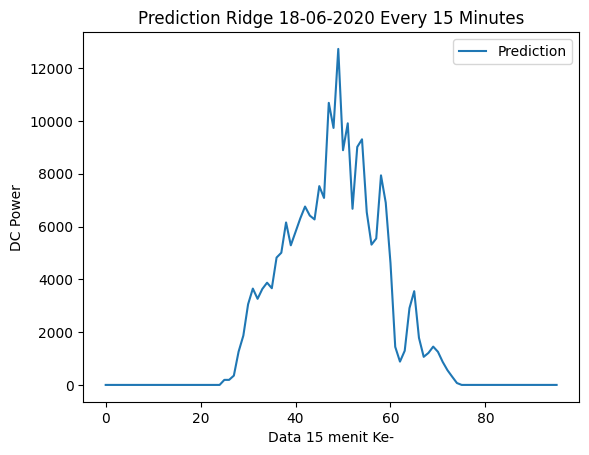

In [ ]:
plt.plot(Data_Prediction)                                  # Line chart hasil prediksi model
plt.title('Prediction Ridge 18-06-2020 Every 15 Minutes')         # Judul plot
plt.xlabel("Data 15 menit Ke-")                                      # Nama sumbu X
plt.ylabel("DC Power")                                 # Nama sumbu Y
plt.legend(labels=['Prediction'])                    # Menambahkan legenda pada plot
plt.show()

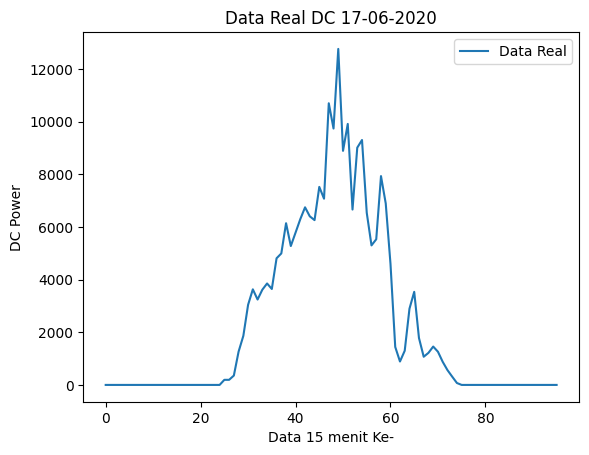

In [ ]:
plt.plot(Data_DC)                                  # Line chart hasil prediksi model
plt.title('Data Real DC 17-06-2020')         # Judul plot
plt.xlabel("Data 15 menit Ke-")                                      # Nama sumbu X
plt.ylabel("DC Power")                                 # Nama sumbu Y
plt.legend(labels=['Data Real'])                    # Menambahkan legenda pada plot
plt.show()

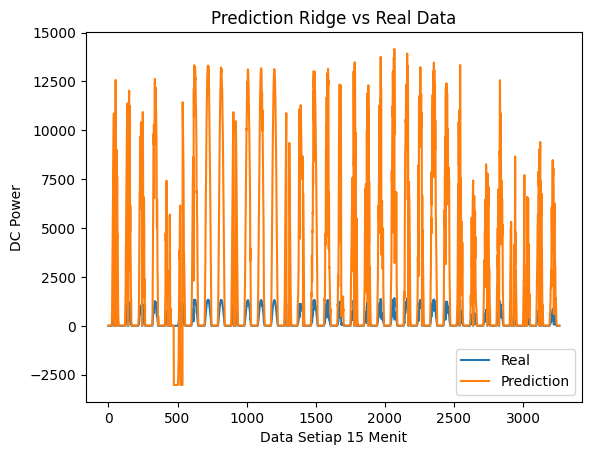

In [ ]:
plt.plot(Data_DC)      #Line chart data sebenarnya
plt.plot(Data_Prediction)                            # Line chart hasil prediksi model
plt.title('Prediction Ridge vs Real Data')         # Judul plot
plt.xlabel("Data Setiap 15 Menit")                                      # Nama sumbu X
plt.ylabel("DC Power")                                 # Nama sumbu Y
plt.legend(labels=['Real','Prediction'])                    # Menambahkan legenda pada plot
plt.show()

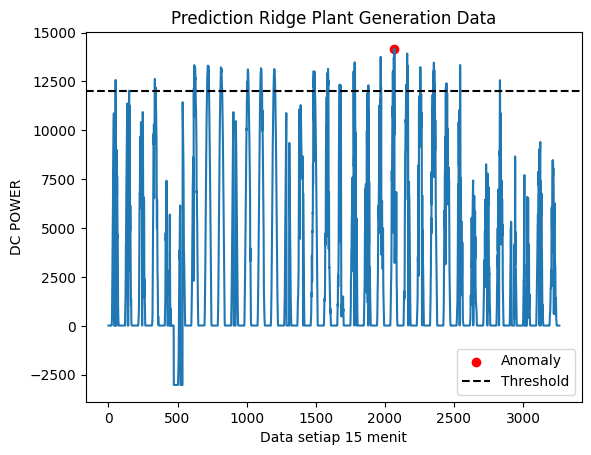

In [ ]:
# Mendapatkan indeks dari puncak grafik
peak_index = Data_Prediction.argmax()

# Mendapatkan nilai DC power pada puncak grafik
peak_dc_power = Data_Prediction[peak_index]

# Menambahkan titik merah pada puncak grafik
fig, ax = plt.subplots()
plt.plot(Data_Prediction)
plt.scatter(peak_index, peak_dc_power, color='red', marker='o', label='Anomaly')
plt.axhline(y=12000, linestyle='--', color='black', label='Threshold')
plt.title("Prediction Ridge Plant Generation Data")
plt.xlabel("Data setiap 15 menit")
plt.ylabel("DC POWER")
plt.legend()
plt.show()

# Deteksi anomali
if peak_dc_power < 12000:
    st.warning(f"Anomaly detected! DC Power is below the threshold at minute {peak_index + 1}.")

Indeks Outlier: [    2     5    24 ... 67659 67678 67681]
Nilai Outlier: [[0.00000000e+00 3.07533333e+03 2.24771958e+09]
 [0.00000000e+00 1.87250000e+03 1.79495863e+09]
 [0.00000000e+00 0.00000000e+00 2.24771958e+09]
 ...
 [0.00000000e+00 3.96800000e+03 1.79511588e+09]
 [0.00000000e+00 4.19700000e+03 2.24791630e+09]
 [0.00000000e+00 3.96800000e+03 1.79511588e+09]]
Panjang outliers: 6406
Panjang dc_power_values[outliers]: 6406


ValueError: ignored

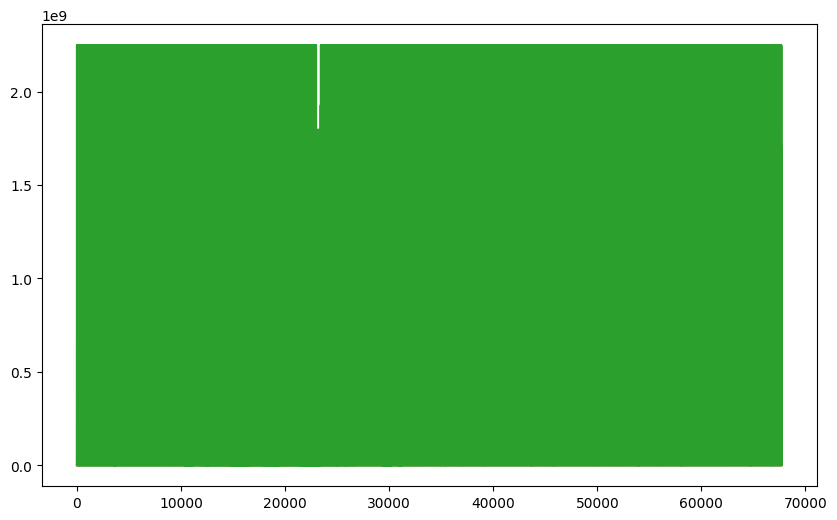

In [ ]:
# Menghitung Z-Score
z_scores = np.abs((Data_Real - np.mean(Data_Real)) / np.std(Data_Real))

# Menentukan batas Z-Score untuk mendefinisikan outlier (contoh: batas Z-Score > 3)
outlier_threshold = 3

# Mendeteksi outlier
outliers = np.where(z_scores > outlier_threshold)[0]

# Menampilkan indeks dan nilai outlier
print("Indeks Outlier:", outliers)
print("Nilai Outlier:", Data_Real[outliers])

# Mengecek panjang keduanya
print("Panjang outliers:", len(outliers))
print("Panjang dc_power_values[outliers]:", len(Data_Real[outliers]))

plt.figure(figsize=(10, 6))
plt.plot(Data_Real, label='DC Power')
plt.scatter(outliers, Data_Real[outliers], color='red', label='Outliers')

plt.title('DC Power with Outliers')
plt.xlabel('Data Point')
plt.ylabel('DC Power')
plt.legend()
plt.show()

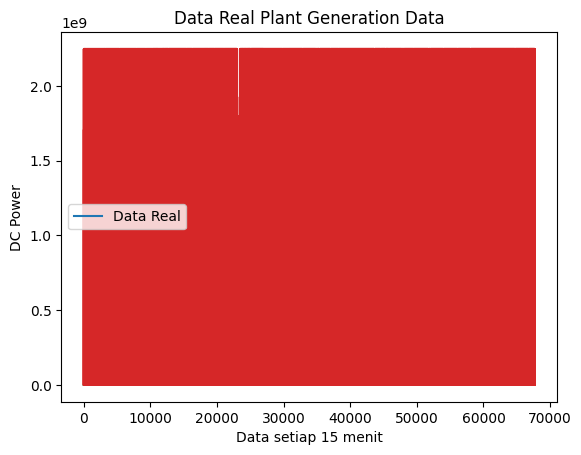

In [ ]:
plt.plot(Data_Real)                                  # Line chart hasil prediksi model
plt.title('Data Real Plant Generation Data')         # Judul plot
plt.xlabel("Data setiap 15 menit")                                      # Nama sumbu X
plt.ylabel("DC Power")                                 # Nama sumbu Y
plt.legend(labels=['Data Real'])                    # Menambahkan legenda pada plot
plt.show()